# Complément au cours k-NN

Dans tout ce qui suit on suppose disposer de $X$ et $Y$, respectivement la matrice des données (numériques) de taille $n \times d$, et le vecteur des réponses de taille $n$. Ces deux éléments sont liés par une fonction a priori inconnue : $y = f(x)$.

Exemple 1 : $X$ = coordonnées des pixels, en lignes et $Y$ = niveau de gris des pixels. <br>
Si certains pixels manquent, on peut chercher à estimer leur niveau de gris $\hat f(x)$. Le chapeau signifie que l'on approxime $f$ (inconnue).
Dans le cas de l'algorithme très simple des $k$ plus proches voisins $\hat f(x) = \frac{1}{k} \sum_{j=1}^{k} y_{v_j}$ où $v_j$ est le $j^{eme}$ voisin de $x$ dans la matrice $X$. (Régression).

Exemple 2 : $X$ = ensemble de contenus textuels d'e-mails et $Y$ = variable binaire "spam" / "non spam". <br>
Cette fois l'algorithme des $k$-NN s'applique difficilement (distance entre e-mails ?). Il existe évidemment d'autres techniques assez efficaces.

Exemple 3 : $X$ = mesures des dimensions de diverses fleurs et $Y$ = sous-espèce (par exemple iris Versicolor/Virginica/Setosa). <br>
L'algorithme des $k$-NN s'écrit ici $\hat f(x) = \texttt{classe majoritaire parmi } \{ y_{v_1}, \dots, y_{v_k} \}$. (Classification).

Exemple 4 : $X$ = mesures effectuées sur des arbres (hauteur, circonférence etc) et $Y$ = âge de l'arbre. <br>
Dans le cas des $k$-NN la formule est la même qu'à l'exemple 1 (régression).

Bien sûr on pourrait utiliser n'importe quel autre algorithme d'apprentissage, et l'appeler encore $\hat f$. Les $k$ plus proches voisins ne sont qu'une méthode (basique mais fondamentale) parmi d'autres.

## Description de l'algorithme

Il a été donné dans les exemples, mais en résumé :
 * Classification : étant donnée une (nouvelle) ligne $x'$, on recherche ses $k$ plus proches voisins dans $X$, puis on prédit la classe de $x'$ ($y'$) par vote majoritaire parmi les $y_{v_j}$.
 * Régression : étant donnée une (nouvelle) ligne $x'$, on recherche ses $k$ plus proches voisins dans $X$, puis on prédit la valeur $y'$ en effectuant la moyenne des $y_{v_j}$.

On peut imaginer utiliser un vote pondéré (par les distances $\|x_{v_j} - x'\|$) au lieu d'un vote majoritaire, et une moyenne pondérée dans le cas de la régression, en se disant qu'un voisin plus proche doit compter plus. Si l'algorithme n'est pas complètement clair dans votre tête vous pouvez oublier ce paragraphe, et sinon vous êtes invités à essayer (cf. dernier slides).

## Choix de $k$ ?

C'est là que ça devient intéressant :) Ce paramètre $k$ détermine l'échelle utilisée pour prédire $\hat y = \hat f(x)$.

Intuitivement, imaginez une ville composée de quartiers eux-même découpés en zones résidentielles composées d'ensembles d'immeubles. Vous y habitez. $k = 1$ revient à ne considérer que votre voisin de palier. $k = 10$ : l'ensemble des habitants des 4 ou 5 étages à votre numéro. $k = 100$ : tous les habitants de l'immeuble. $k = 1000$ : tous les habitants de la zone. $k = 10000$ : tous les habitants du quartier. $k = 100000$ : tous les habitants de la ville.

Si l'on cherche à prédire dans quel supermarché vous vous rendez, on sent bien que $k = 1000$ est intéressant. En revanche si l'on veut prédire à quel cinéma vous vous rendez ou encore dans quelle médiathèque vous lisez, $k = 10000$ paraît mieux (les supermarchés sont plus denses que les cinémas !). Et si l'objectif est de prédire votre type de raccordement internet (ADSL, cable, fibre) alors $k = 10$ ou $k = 100$ est plus approprié. Bien sûr cet exemple est un peu bête, mais il illustre bien l'importance du choix de $k$.

Alors comment déterminer $k$ de façon automatique et fiable ? Réponse : on ne peut pas. Imaginez que l'on tienne compte également de zones résidentielles composées de maisons, pour rester sur le même exemple. Du point de vue d'une maison $k = 100$ englobe déjà tout une zone : il n'y a pas de $k$ optimal applicable partout.

## Reste-t-il un espoir ?!

On considèrera toujours que les données ne sont pas à densité trop variable (sauf quand notre algorithme s'y prête : certains sont conçus spécialement pour cette situation). Cela suppose un bon échantillonnage en amont : faisons confiance aux statisticiens ayant récolté les données :)

Ensuite, la stratégie habituelle consiste à balayer diverses valeurs de $k$ pour lesquelles on évalue l'algorithme. On retient la valeur menant aux meilleures performances. Très bien, mais il reste donc à déterminer comment évaluer l'algorithme.

## Évaluation de l'algorithme - part I

Comme indiqué dans les slides du cours, une première idée consiste à diviser $X$ (et donc $Y$) en deux sous-ensembles :
 * $X_{train}$ / $Y_{train}$ : données d'entrainement ;
 * $X_{test}$ / $Y_{test}$ : données de test.
L'ensemble des indices de test peut être déterminé alétoirement, et la taille de l'ensemble de test fixée à 30 ou 40% du nombre de lignes de $X$. La performance peut alors être mesurée par le taux de bonne prédictions dans le cas de la classification, et (par exemple) par la moyenne des $\|\hat y - y\|$ concernant la régression.

Exemple :

In [1]:
from sklearn import datasets, neighbors, model_selection
from numpy import mean

# Chargement du jeu de données
iris = datasets.load_iris()
# Division en ensembles d'apprentissage / test
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    iris["data"], iris["target"], test_size=0.3, shuffle=True, random_state=10)

# Parcours d'une grille de valeurs de k arbitraires
kgrid = [1, 7, 11, 19, 25, 45]
scores = []
for k in kgrid:
    # Définition du modèle : vote majoritaire parmi les k-PPV
    model = neighbors.KNeighborsClassifier(n_neighbors=k)
    # "Entraînement" :
    fitted = model.fit(X_train, y_train)
    # Évaluation de l'erreur sur l'ensemble de test :
    predictions = fitted.predict(X_test)
    scores.append(mean(predictions == y_test))

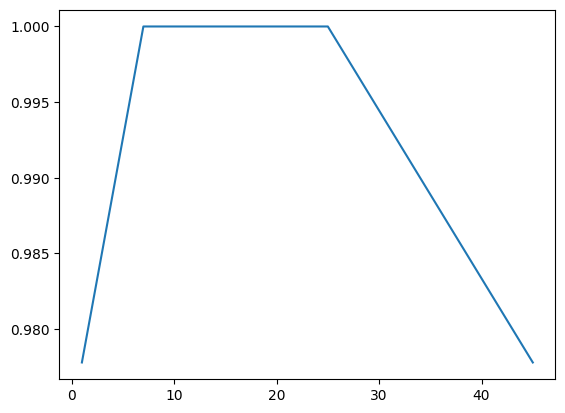

In [2]:
from matplotlib import pyplot as plt

plt.plot(kgrid, scores)

La précision semble excellente pour un nombre de voisins entre 7 et 25 : on peut choisir par exemple $k = 19$.

Ce choix de $k$ est cependant optimisé pour ce jeu de test précis : il n'est pas garanti qu'il reste bon pour un autre jeu de test :

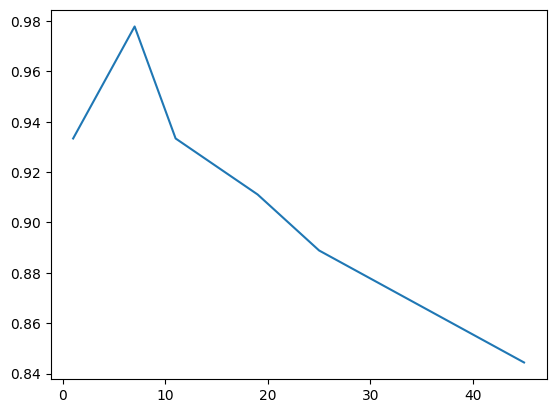

In [3]:
# Je change le "random_state" (graine du générateur aléatoire)
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    iris["data"], iris["target"], test_size=0.3, shuffle=True, random_state=11)
kgrid = [1, 7, 11, 19, 25, 45]
scores = []
for k in kgrid:
    model = neighbors.KNeighborsClassifier(n_neighbors=k)
    fitted = model.fit(X_train, y_train)
    predictions = fitted.predict(X_test)
    scores.append(mean(predictions == y_test))
plt.plot(kgrid, scores)

Cette fois $k = 7$ est le meilleur choix. Comment s'en sortir ?!

## Évaluation de l'algorithme - part II

Une seconde idée venant assez naturellement consiste à répéter l'opération $V$ fois avec $V$ de l'ordre de 10 ou 100 par exemple. En effectuant la moyenne des scores pour chaque valeur de $k$, on peut espérer obtenir une estimation plus fiable.

In [4]:
# Au lieu d'écrire la boucle sur les valeurs de k, on va utiliser une fonction prédéfinie de scikit-learn : GridSearchCV.
# Cette fonction prend comme principaux arguments la manière dont on souhaite découper les données
# (on choisit ici un cas simple : V fois la séparation précédente, au hasard),
# et une grille de paramètres (ici les valeurs de k).

# La fonction évalue le modèle sur chaque découpage train/test pour chaque valeur de k,
# et renvoit des statistiques sur les performances obtenues.

# Grille de valeurs de k arbitraires
param_grid = {'n_neighbors':[7, 9, 11, 13, 15, 19, 23]}
# 20 découpages aléatoires en train/test avec 0.3 * n échantillons de test à chaque fois
# random_state détermine l'aléa, et ne doit pas avoir d'importance pour V "grand".
splits = model_selection.ShuffleSplit(n_splits=20, test_size=0.3, random_state=10)

# Attention pour la régression "scoring = 'accuracy'" serait inapproprié.
# Il faudrait plutôt choisir "scoring = 'neg_mean_absolute_error'" par exemple.
scv = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), param_grid, cv=splits, scoring="accuracy")
# On passe logiquement les données non découpées cette fois :
c = scv.fit(iris["data"], iris["target"])

In [5]:
print(c.best_params_)

{'n_neighbors': 9}


C'est déjà pas mal ! Si vous avez compris ça, c'est l'essentiel. On peut cependant raffiner :
 1. effectuer le découpage selon une partition des données au lieu de re-piocher au hasard à chaque fois ;
 2. essayer de répartir équitablement les labels (y) dans chacun des groupes.

Ces deux idées ne sont pas incompatibles : ce n'est donc pas un hasard si scikit-learn fournit les méthodes KFold et StratifiedKFold correspondant respectivement aux points 1 et 2.

In [6]:
# 1] on remplace ShuffleSplit par KFold dans le code ci-dessus :
splits = model_selection.KFold(n_splits=10, shuffle=True, random_state=10)
# shuffle = True permute d'abord aléatoirement les données - c'est en général nécessaire piur éviter un biais.

# 2] on remplace ShuffleSplit par StratifiedKFold dans le code ci-dessus :
splits = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=10)

# Dans les deux cas : tout le reste est identique. Essayez !

Enfin, on peut décider de n'enlever qu'une seule ligne à chaque fois, d'apprendre sur toutes les autres et de tester sur cette seule ligne retirée : c'est le leave-one-out. Un cas extrême du KFold (choisir n_splits = n). Cette méthode a ses avantages et inconvénients. Elle est en tout cas assez populaire pour disposer d'une fonction à part LeaveOneOut, équivalente à KFold(n_splits = n).

Et en régression ? C'est exactement pareil, on fera juste attention à changer l'argument "scoring", et à utiliser KNeighborsRegressor au lieu de KNeighborsClassifier : cf. exercices.

# Bilan

Ce cours a pour but de vous familiariser avec quelques méthodes (très classiques) de recherche de paramètres de modèle optimaux. On prend ici l'exemple des $k$ plus proches voisins, cas simple car il n'y a qu'une seule valeur à ajuster : $k$. La même procédure pourrait être appliquée pour un modèle à plusieurs paramètres : on remplacerait la grille (1D) de valeurs de $k$ par une double boucle parcourant une grille 2D, par exemple. Au-delà, on peut imaginer régler les paramètres un par un en fixant les autres à des valeurs "standard" (sinon le parcours de la grille multi-dimensionnelle risque d'être coûteux).

Il existe bien sûr d'autres méthodes d'évaluation de modèles. Celle-ci par exemple est assez sympa https://hal.science/hal-01585595 - mais il faut avoir compris la validation croisée d'abord !